In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)
%cd -q ../test/

# SparseEdges & SparseLets


Our goal here is to test the influence of the size of the image on its sparseness.  

This class exploits the SparseEdges package to provide with a sparse representation of edges in images.

This notebook reproduces the figure 14.3 of the following paper:

~~~~{.bibtex}
@inbook{Perrinet15bicv,
    author = {Perrinet, Laurent U.},
    booktitle = {Biologically-inspired Computer Vision},
    chapter = {13},
    citeulike-article-id = {13566753},
    editor = {Keil, Matthias and Crist\'{o}bal, Gabriel and Perrinet, Laurent U.},
    keywords = {anr-trax, bicv-sparse},
    posted-at = {2015-03-31 14:21:35},
    priority = {2},
    publisher = {Wiley, New-York},
    title = {Sparse models},
    year = {2015}
}
~~~~


More information is available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/SparseEdges.ipynb
Tests for the packages are available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/test-SparseEdges.ipynb.

### Effect of parameters on edge extraction: image size



In [2]:
%%writefile experiment_sparselets.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python experiment_fig-sparselets.py ./figures

$ rm -fr **/SparseLets* **/**/SparseLets* 

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
    
from SparseEdges import SparseEdges

mps = []
sizes = [16, 32, 64, 128, 256]
N_image = 32
N = 2048

for size, size_str in zip(sizes, ['_016', '_032', '_064',  '_128', '']):
    mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp.pe.seed = 42
    mp.pe.datapath = 'database/'
    mp.set_size((size, size))
    downscale_factor = sizes[-1]/size # > 1
    mp.pe.N_image = int(N_image*downscale_factor)
    mp.pe.N = int(N/downscale_factor**2)
    mp.init()
    mp.process('SparseLets' + size_str)
    mps.append(mp)

import matplotlib.pyplot as plt
fig_width_pt = 318.67085 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig = plt.figure(figsize=(fig_width, fig_width/1.618))

experiments = ['SparseLets_' + '%0.3d' % size for size in sizes]
experiments[-1] = 'SparseLets'
databases = ['serre07_distractors'] * len(experiments)
labels = [str(size) for size in sizes]
fig, ax, inset = mp.plot(fig=fig, mps=mps, experiments=experiments, databases=databases, 
                  labels=labels, scale=True)    

mp.savefig(fig, 'SparseLets_B', figpath = '../figures/')

Overwriting experiment_sparselets.py


ValueError: max() arg is an empty sequence

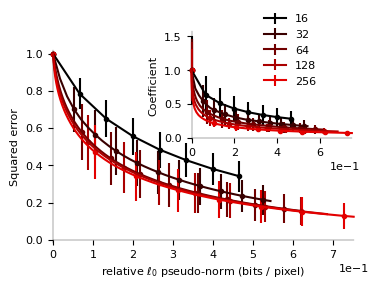

In [3]:
%run experiment_sparselets.py
fig

## some book keeping for the notebook

In [4]:
import version_information, watermark

In [5]:
%watermark

In [6]:
%version_information numpy, scipy, matplotlib

In [7]:
%cd -q ../notebooks